In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calcular_rendimento_cdi(capital_inicial, aporte_mensal, taxa_cdi_anual, meses):
    taxa_cdi_mensal = (1 + taxa_cdi_anual) ** (1/12) - 1
    saldo = capital_inicial
    historico = []

    for mes in range(1, meses + 1):
        saldo = saldo * (1 + taxa_cdi_mensal) + aporte_mensal
        historico.append(saldo)

    return historico

def calcular_rendimento_poupanca(capital_inicial, aporte_mensal, meses):
    # Taxa de rendimento da poupança (70% da Selic + TR, considerando TR = 0)
    taxa_poupanca_mensal = 0.0059  # Aproximadamente 0.59% ao mês
    saldo = capital_inicial
    historico = []

    for mes in range(1, meses + 1):
        saldo = saldo * (1 + taxa_poupanca_mensal) + aporte_mensal
        historico.append(saldo)

    return historico

def simulador(cdi_anual, capital_inicial, aporte_mensal, meses):
    cdi_resultados = calcular_rendimento_cdi(capital_inicial, aporte_mensal, cdi_anual, meses)
    poupanca_resultados = calcular_rendimento_poupanca(capital_inicial, aporte_mensal, meses)
    
    dados = {
        'Mês': list(range(1, meses + 1)),
        'Saldo CDI': cdi_resultados,
        'Saldo Poupança': poupanca_resultados
    }
    
    df = pd.DataFrame(dados)
    return df




## Parâmetros Iniciais

In [5]:
# Parâmetros de exemplo
capital_inicial = 10000  # Capital inicial
aporte_mensal = 500     # Aporte mensal
taxa_cdi_anual = 0.12   # Taxa CDI anual de 12%
meses = 24              # Período de 2 anos



### Em Tabela

In [4]:
# Executa o simulador
resultado = simulador(taxa_cdi_anual, capital_inicial, aporte_mensal, meses)

#Em tabela
print(resultado)

    Mês     Saldo CDI  Saldo Poupança
0     1  11131.696111    11059.000000
1     2  12278.296220    12124.248100
2     3  13439.996607    13195.781164
3     4  14616.996136    14273.636273
4     5  15809.496291    15357.850727
5     6  17017.701209    16448.462046
6     7  18241.817716    17545.507972
7     8  19482.055362    18649.026469
8     9  20738.626455    19759.055725
9    10  22011.746101    20875.634154
10   11  23301.632238    21998.800396
11   12  24608.505673    23128.593318
12   13  25932.590123    24265.052018
13   14  27274.112251    25408.215825
14   15  28633.301703    26558.124299
15   16  30010.391152    27714.817232
16   17  31405.616333    28878.334654
17   18  32819.216088    30048.716828
18   19  34251.432401    31226.004257
19   20  35702.510447    32410.237683
20   21  37172.698626    33601.458085
21   22  38662.248611    34799.706688
22   23  40171.415391    36005.024957
23   24  41700.457310    37217.454604


### Em gráfico

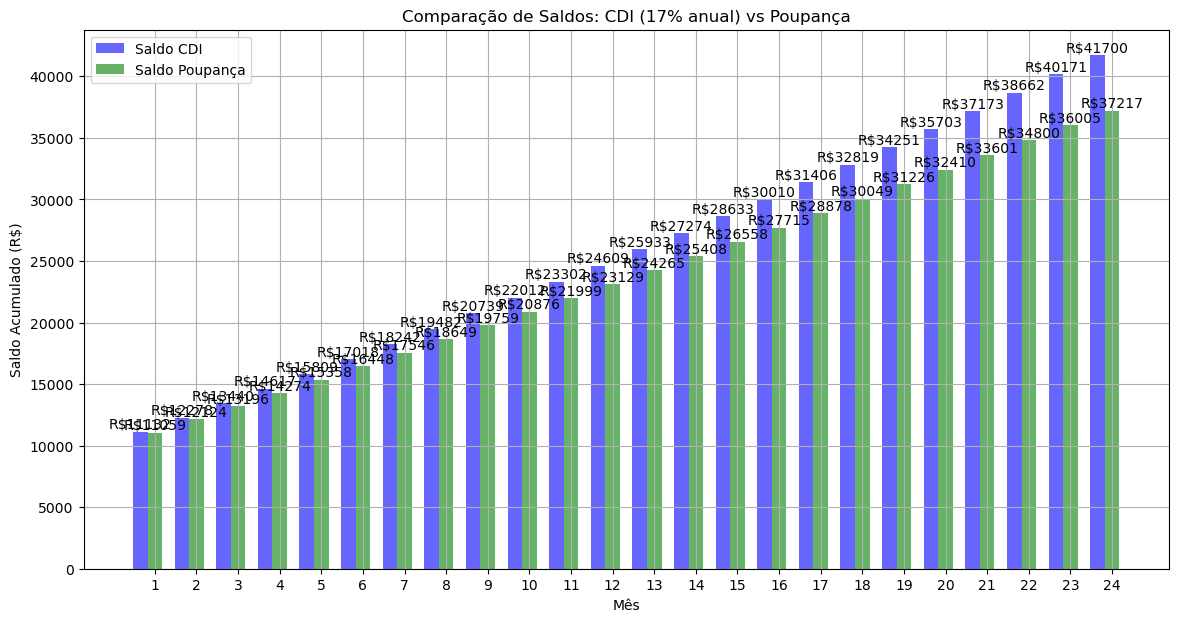

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Gera o gráfico de barras lado a lado
bar_width = 0.35
indices = np.arange(len(resultado['Mês']))

plt.figure(figsize=(14, 7))
bars_cdi = plt.bar(indices - bar_width/2, resultado['Saldo CDI'], bar_width, label='Saldo CDI', alpha=0.6, color='blue')
bars_poupanca = plt.bar(indices + bar_width/2, resultado['Saldo Poupança'], bar_width, label='Saldo Poupança', alpha=0.6, color='green')

plt.xlabel('Mês')
plt.ylabel('Saldo Acumulado (R$)')
plt.title('Comparação de Saldos: CDI (17% anual) vs Poupança')
plt.xticks(indices + bar_width / 2, resultado['Mês'])
plt.legend()
plt.grid(True)

# Adiciona os labels com os valores nas barras
for bar in bars_cdi:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'R${yval:.0f}', ha='center', va='bottom')

for bar in bars_poupanca:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'R${yval:.0f}', ha='center', va='bottom')

    
# Exibe o gráfico
plt.show()
